In [1]:
%pip install distrax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 272 kB 5.2 MB/s 
     |████████████████████████████████| 72 kB 653 kB/s 


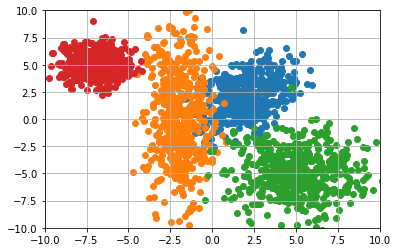

In [2]:
import jax
import jax.numpy as jnp
import distrax
import matplotlib.pyplot as plt
key = jax.random.PRNGKey(42)
jax.config.update("jax_enable_x64", True)

plt.ion()
plt.figure()
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.grid()

#Full Covariance
covariance = jnp.array([[2.0, 1.0], [1.0, 3.0]])
L = jnp.linalg.cholesky(covariance)
X_full = distrax.MultivariateNormalTri(loc=jnp.array([2,2]),scale_tri=L, is_lower=True)

data_full = X_full.sample(seed = key, sample_shape = (500,))

plt.scatter(data_full[:,0], data_full[:,1])

#Diagonal Covariance
X_diag = distrax.MultivariateNormalDiag(loc=jnp.array([-2,0]),scale_diag=jnp.array([1.0,4.0]))

data_diag = X_diag.sample(seed = key, sample_shape = (500,))

plt.scatter(data_diag[:,0], data_diag[:,1])

X_spherical = distrax.MultivariateNormalDiag(loc=jnp.array([5,-5]),scale_diag=2.0*jnp.ones(2))

data_spherical = X_spherical.sample(seed = key, sample_shape = (500,))

plt.scatter(data_spherical[:,0], data_spherical[:,1])

#Alternative way to define 
X_spherical1 = distrax.Normal(loc=jnp.array([-7,5]),scale=1.0)

X= spherical1 = distrax.Independent(X_spherical1, reinterpreted_batch_ndims=1)
data_spherical1 = X_spherical1.sample(seed = key, sample_shape = (500,))

plt.scatter(data_spherical1[:,0], data_spherical1[:,1])

In [27]:
import seaborn as sns
def marginal(a,b,cor):
  data = jax.random.multivariate_normal(key, mean = jnp.array([0, 0]), cov = jnp.array([[a, cor], [cor, b]]), shape=(5000, ))

  a = sns.jointplot(x = data[:,0], y = data[:,1],
                kind = "reg", data = data,fit_reg = False,marginal_kws=dict(bins=30, fill=False))

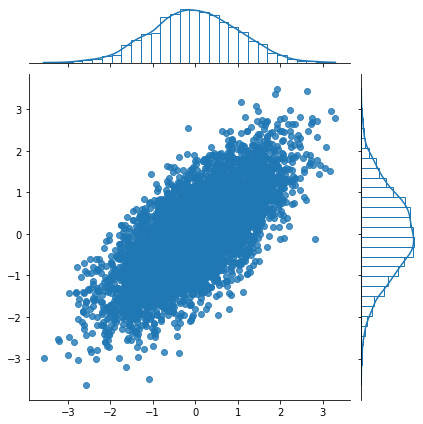

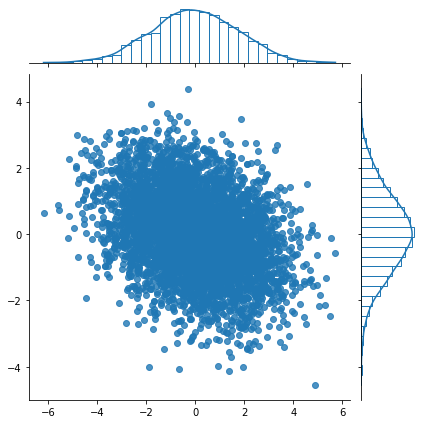

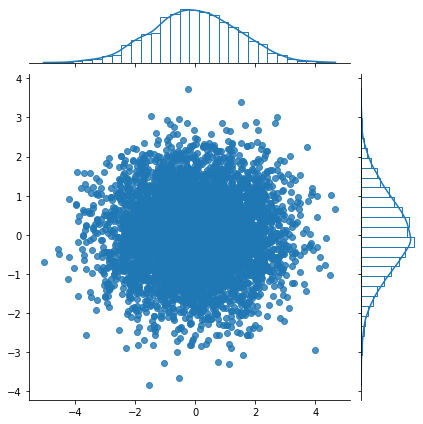

In [29]:
marginal(1,1,0.7)
marginal(3, 1.5, -0.7)
marginal(2,1,0)

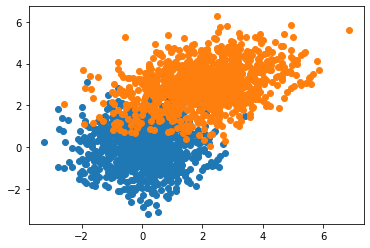

In [34]:
plt.ion()
plt.figure()

X = jax.random.normal(key, shape=(1000,2))

plt.scatter(X[:,0],X[:,1])

mu = jnp.array([2,3])
cov = jnp.array([[2.0,0.5],[0.5,1.0]])

L = jnp.linalg.cholesky(cov)

Y = mu + jnp.dot(X,L.T)

plt.scatter(Y[:,0],Y[:,1])